In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create dataframe from local csv file
stroke_data =pd.read_csv('../Data/train_2v.csv')

# We will start by preview our data and determing what kind of problem we have. 

In [3]:
# Preview dataframe
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
# Get shape of dataframe
stroke_data.shape

(43400, 12)

In [5]:
# Get the number of indiviudals who had a stroke.
number_of_people_who_had_a_stroke = len(stroke_data[stroke_data["stroke"] == 1])
number_of_people_who_had_a_stroke

783

In [6]:
# Get the percentage of people who had a stroke
percentage_of_people_who_had_a_stroke = (number_of_people_who_had_a_stroke / len(stroke_data) ) * 100
percentage_of_people_who_had_a_stroke

1.804147465437788

 # After previewing our data, we see that we have a classification problem.  We will determine what the most appropriate features are, and use these to predict whether an individual will have a stroke.
 
 # We also notice that only about 1.8% of the individuals in our dataset had a stroke.  We will have to find a way to deal with imbalanced data.

# 1. Prework / Data Cleansing

In [7]:
# We do not want to work with unique identifiers.
# We will therefore drop the id column.

del stroke_data["id"]
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [8]:
# Check for NaN values
stroke_data.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [9]:
# Get number of unique values in smoking_status column
stroke_data['smoking_status'].nunique()

3

In [10]:
# Get each unique value from smoking_status column
stroke_data['smoking_status'].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [11]:
# Get number of unique values in bmi column
stroke_data['bmi'].nunique()

555

### We are working with NaN data.  We have a few options for what to do.

1. Fill NaN with zeros
2. Fill the nas with the mean/median/mode
3. Label encode the three categories

In [12]:
# We need to do something about the NaN values in the bmi and smoking_status column
# We could try a few things:
# 1. fill the NaN values in the bmi column with the mean/median/mode bmi value.
# 2. drop any row where this value is NaN altogether.
# 3. Assume any NaN value in the smoking_status column corresponds to "never smoked, then to "smokes,"and compare the results of the algorithms. 
# The second option could help alleviate the imbalanaced data issue.

stroke_data["bmi"].fillna(stroke_data["bmi"].mean(), inplace=True)
# stroke_data.dropna(how="any",inplace=True)

stroke_data.dropna(axis=0, inplace=True)

# Get shape of dataframe after dropping NaN values
stroke_data.shape

(30108, 11)

In [13]:
# Confirm no NaN values
stroke_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
# Get the number of indiviudals who had a stroke after dropping NaN values in the smoking_status column.
number_of_people_who_had_a_stroke = len(stroke_data[stroke_data["stroke"] == 1])
number_of_people_who_had_a_stroke

638

In [15]:
# Get the percentage of people who had a stroke after dropping NaN values in the smoking_status column.
percentage_of_people_who_had_a_stroke = (number_of_people_who_had_a_stroke / len(stroke_data) ) * 100
percentage_of_people_who_had_a_stroke

2.1190381294008236

After dropping all rows with an NaN value in the smoking_status column, the percentage of individuals who had a stroke still only make up about 2.12% of the data.  Our data is still wildly imbalanced, so we do not believe simply dropping these rows will cause harm to our Machine Learning Model.

## 2. Data Exploration

Text(0.5,1,'Stroke Count: 1 corresponds to "had a stroke"')

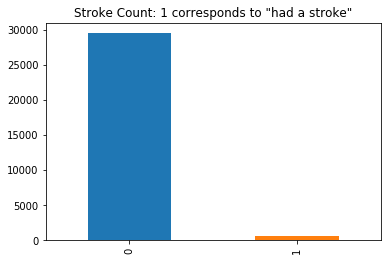

In [16]:
# Make bar plot to see count of how many people did and did not have a stroke
stroke_data.stroke.value_counts().plot(kind="bar")
plt.title("Stroke Count: 1 corresponds to \"had a stroke\"")

In [17]:
# Create list of possible categorical features
possible_categorical_features = ["gender",
                                 "hypertension",
                                 "heart_disease",
                                 "ever_married",
                                 "work_type",
                                 "Residence_type",
                                 "smoking_status"]

# Create list of possible numerical features
possible_categorical_features = ["age",
                                 "avg_glucose_level",
                                 "bmi"]

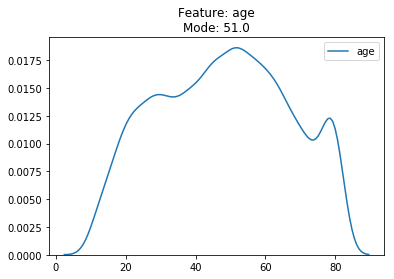

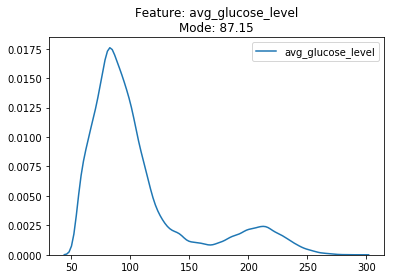

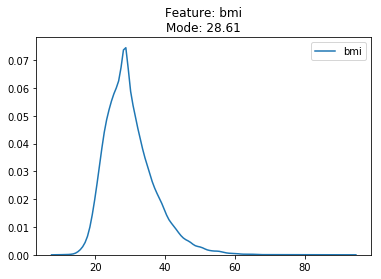

In [18]:
# Get kdeplot for each possible categorical feature
for possible_feature in possible_categorical_features:
    sns.kdeplot(stroke_data[possible_feature])
    plt.title(f"Feature: {possible_feature}\nMode: {round(stroke_data.mode()[possible_feature][0], 2)}")
    plt.show()

### From the KDE plots, we notice that,

1. Most samples appear to have an age in the 50s.
2. Most samples have an average glucose level (AVG) a little less than 100, perhaps around 80-90.  The frequency of AVGs drop sharply after this value, though there is a slight spike in frequency for individuals with an average glucose level just over 200.
3. Most samples have an average bmi somewhere around 30.

## 3. Model Building

In [19]:
# Transform data to binary encoded data
stroke_data_binary_encoded = pd.get_dummies(stroke_data, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"])
stroke_data_binary_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,58.0,1,0,87.96,39.2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,70.0,0,0,69.04,35.9,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6,52.0,0,0,77.59,17.7,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
7,75.0,0,1,243.53,27.0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
8,32.0,0,0,77.67,32.3,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [20]:
# Create our features and label
X = stroke_data_binary_encoded.drop(["stroke"], axis=1)
y = stroke_data_binary_encoded["stroke"].values.reshape(-1,1)

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

# Create scale for features and label
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Scale features and labels
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
